In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tempfile
import sklearn
import tensorflow as tf
from sklearn.calibration import calibration_curve
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import Callback,ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras_visualizer import visualizer 
import keras.backend as K
from keras.utils.vis_utils import plot_model
from ann_visualizer.visualize import ann_viz
from keras_visualizer import visualizer 
from sklearn.metrics import precision_recall_fscore_support


#data loading into a dataframe

data = pd.read_csv('C:/Users/HP/Documents/riskfactor1 (version 1).csv')

    
print('Dimension of the dataset : ', data.shape)

print(data.head())


print(data.head)


Dimension of the dataset :  (509410, 13)
   year  age_group_5_years  race_eth  first_degree_hx  age_menarche  \
0  2013                  7         1                0             9   
1  2013                  7         1                0             9   
2  2013                  7         1                0             9   
3  2013                  7         1                0             9   
4  2013                  7         1                0             9   

   age_first_birth  BIRADS_breast_density  current_hrt  menopaus  bmi_group  \
0                3                      1            1         2          3   
1                3                      1            1         2          3   
2                3                      1            1         2          4   
3                3                      1            1         2          4   
4                3                      1            1         2          4   

   biophx  breast_cancer_history  count  
0       0      

In [4]:
data.describe()


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
count,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000,509410.000000
mean,2015.081247,7.631450,2.618251,0.735631,4.441723,3.410616,2.703176,1.996679,2.547865,3.824666,0.958856,2.352274,3.992260
std,1.328799,2.493823,2.184274,1.946982,4.038323,3.090162,1.589520,3.663389,2.138683,2.999981,2.161616,3.791394,12.548151
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2014.000000,6.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000
50%,2015.000000,7.000000,2.000000,0.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000
75%,2016.000000,9.000000,3.000000,1.000000,9.000000,4.000000,3.000000,1.000000,2.000000,4.000000,1.000000,1.000000,3.000000
max,2017.000000,13.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,923.000000


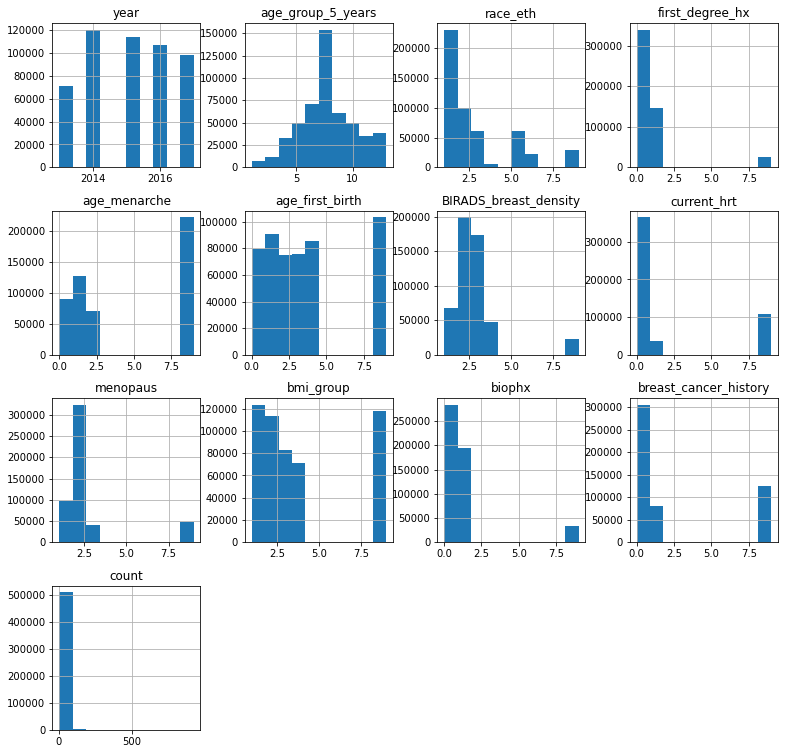

In [5]:
data.hist(figsize = (13,13))
plt.show()

[0.01413082 0.86862359 0.0073275  0.00372664 0.00554824 0.00906155
 0.00739821 0.00497705 0.04989599 0.00723466 0.00385354 0.0037396
 0.01448261]


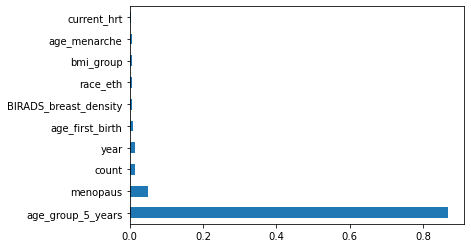

In [6]:
#feature importance
X = data.iloc[:,0:13]  
y = data.iloc[:,-12]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

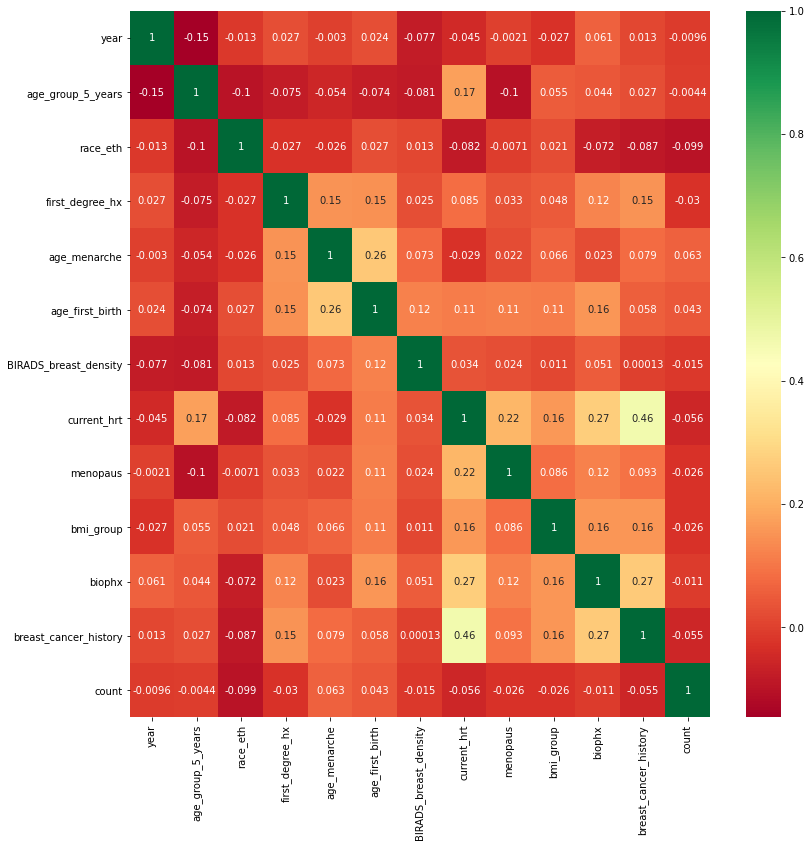

In [7]:
#correlation
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
#data = data.rename(columns={"breast_cancer_history":'Label'})
#print(data.dtypes)

no_cancer = len(data[data['breast_cancer_history'] == 1])
print(no_cancer)
non_cancer = len(data[data['breast_cancer_history'] == 0])
print(non_cancer)
un_cancer = len(data[data['breast_cancer_history'] == 9])
print(un_cancer)
total = non_cancer + no_cancer + un_cancer
print('Total: {}\n    Women with Cancer: {} ({:.2f}% of total)\n'.format(
    total, no_cancer, 100 * no_cancer / total))
print('Total: {}\n    Women no with Cancer: {} ({:.2f}% of total)\n'.format(
    total, non_cancer, 100 * non_cancer / total))
print('Total: {}\n    Women unknown: {} ({:.2f}% of total)\n'.format(
    total, un_cancer, 100 * un_cancer / total))

80400
304802
124208
Total: 509410
    Women with Cancer: 80400 (15.78% of total)

Total: 509410
    Women no with Cancer: 304802 (59.83% of total)

Total: 509410
    Women unknown: 124208 (24.38% of total)



In [9]:
#pre-processing
data.drop(data[data['breast_cancer_history'] >=9].index, inplace = True)

print(data.shape)

data.drop(data[data['age_first_birth'] >=9].index, inplace = True)

print(data.shape)

data.drop(data[data['first_degree_hx'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['age_menarche'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['bmi_group'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['menopaus'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['race_eth'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['biophx'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['BIRADS_breast_density'] >=9].index, inplace = True)
print(data.shape)

data.drop(data[data['current_hrt'] >=9].index, inplace = True)
print(data.shape)

(385202, 13)
(314324, 13)
(308115, 13)
(204793, 13)
(169746, 13)
(161796, 13)
(149166, 13)
(149056, 13)
(147221, 13)
(141210, 13)


In [10]:
#renaming the target variable
data = data.rename(columns={"breast_cancer_history":'Label'})
print(data.dtypes)

no_cancer = len(data[data['Label'] == 1])
print(no_cancer)
non_cancer = len(data[data['Label'] == 0])
print(non_cancer)
total = non_cancer + no_cancer
print('Total: {}\n    Women with Cancer: {} ({:.2f}% of total)\n'.format(
    total, no_cancer, 100 * no_cancer / total))
print('Total: {}\n    Women no with Cancer: {} ({:.2f}% of total)\n'.format(
    total, non_cancer, 100 * non_cancer / total))
#cleaned_data2= data.copy()
#cleaned_data2.pop('count')

year                     int64
age_group_5_years        int64
race_eth                 int64
first_degree_hx          int64
age_menarche             int64
age_first_birth          int64
BIRADS_breast_density    int64
current_hrt              int64
menopaus                 int64
bmi_group                int64
biophx                   int64
Label                    int64
count                    int64
dtype: object
26138
115072
Total: 141210
    Women with Cancer: 26138 (18.51% of total)

Total: 141210
    Women no with Cancer: 115072 (81.49% of total)



In [11]:
#pre-processing
cleaned_data = data.copy()
cleaned_data.pop('year')

1411      2013
1412      2013
1413      2013
1414      2013
1415      2013
          ... 
509308    2017
509311    2017
509312    2017
509328    2017
509330    2017
Name: year, Length: 141210, dtype: int64

In [12]:
#data splitting
train_X, test_X = train_test_split(cleaned_data, test_size=0.2)
train_X, val_X = train_test_split(train_X, test_size=0.2)

train_labels = np.array(train_X.pop('Label'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_X.pop('Label'))
test_labels = np.array(test_X.pop('Label'))

train_features = np.array(train_X)
val_features = np.array(val_X)
test_features = np.array(test_X)

In [13]:
#feature scaling
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (90374,)
Validation labels shape: (22594,)
Test labels shape: (28242,)
Training features shape: (90374, 11)
Validation features shape: (22594, 11)
Test features shape: (28242, 11)


In [14]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [15]:
#defining the metrics
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      get_f1
]

#model functon definition
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          256, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
      #model.add(Dense(64, input_dim= (train_features.shape[-1],), activation='relu'))
      #
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [63]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

model = make_model()
model.summary()
#visualizer(model, filename='example1', format='png', view=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               3072      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 36,097
Trainable params: 36,097
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.predict(train_features[:10])

array([[0.15841112],
       [0.13518164],
       [0.1578336 ],
       [0.18942389],
       [0.1267635 ],
       [0.13320637],
       [0.15065217],
       [0.18511873],
       [0.18027312],
       [0.13253099]], dtype=float32)

In [18]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4881


In [19]:
initial_bias = np.log([no_cancer/non_cancer])
initial_bias

array([-1.48216783])

In [20]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.21054521],
       [0.2419112 ],
       [0.17409253],
       [0.20218396],
       [0.24120021],
       [0.2247636 ],
       [0.2137914 ],
       [0.18472981],
       [0.16582456],
       [0.18678653]], dtype=float32)

In [21]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4741


In [22]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [23]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [24]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

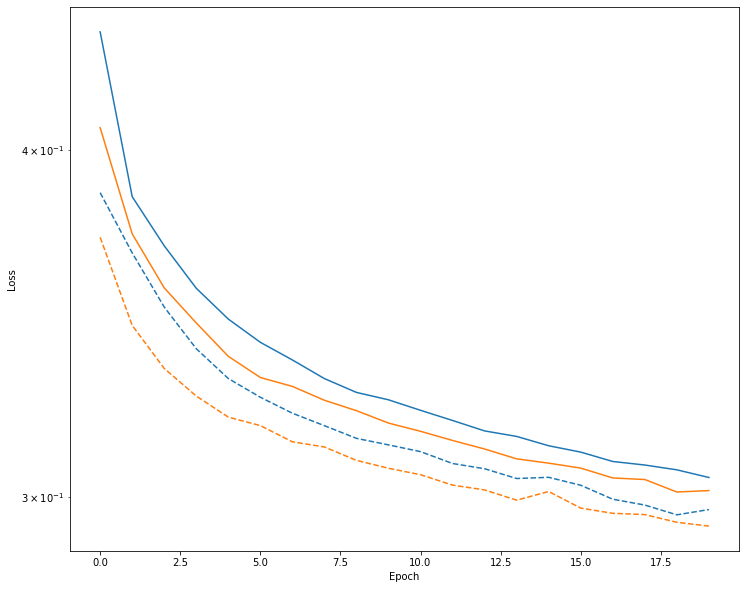

In [25]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [26]:
#training the model
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
45/45 [==============================] - 11s 246ms/step - loss: 0.4082 - tp: 3164.0000 - fp: 2237.0000 - tn: 89940.0000 - fn: 17627.0000 - accuracy: 0.8242 - precision: 0.5858 - recall: 0.1522 - auc: 0.7979 - prc: 0.4657 - get_f1: 0.1411 - val_loss: 0.3714 - val_tp: 340.0000 - val_fp: 288.0000 - val_tn: 18157.0000 - val_fn: 3809.0000 - val_accuracy: 0.8187 - val_precision: 0.5414 - val_recall: 0.0819 - val_auc: 0.8222 - val_prc: 0.4532 - val_get_f1: 0.1301
Epoch 2/100
45/45 [==============================] - 3s 77ms/step - loss: 0.3745 - tp: 2450.0000 - fp: 2131.0000 - tn: 71601.0000 - fn: 14192.0000 - accuracy: 0.8194 - precision: 0.5348 - recall: 0.1472 - auc: 0.8170 - prc: 0.4478 - get_f1: 0.2322 - val_loss: 0.3474 - val_tp: 596.0000 - val_fp: 224.0000 - val_tn: 18221.0000 - val_fn: 3553.0000 - val_accuracy: 0.8328 - val_precision: 0.7268 - val_recall: 0.1436 - val_auc: 0.8543 - val_prc: 0.5565 - val_get_f1: 0.2497
Epoch 3/100
45/45 [==============================] - 2s 

45/45 [==============================] - 2s 36ms/step - loss: 0.2883 - tp: 7328.0000 - fp: 2714.0000 - tn: 71018.0000 - fn: 9314.0000 - accuracy: 0.8669 - precision: 0.7297 - recall: 0.4403 - auc: 0.8988 - prc: 0.6980 - get_f1: 0.5474 - val_loss: 0.2809 - val_tp: 1609.0000 - val_fp: 374.0000 - val_tn: 18071.0000 - val_fn: 2540.0000 - val_accuracy: 0.8710 - val_precision: 0.8114 - val_recall: 0.3878 - val_auc: 0.9058 - val_prc: 0.7197 - val_get_f1: 0.5191
Epoch 36/100
45/45 [==============================] - 2s 37ms/step - loss: 0.2867 - tp: 7461.0000 - fp: 2722.0000 - tn: 71010.0000 - fn: 9181.0000 - accuracy: 0.8683 - precision: 0.7327 - recall: 0.4483 - auc: 0.9003 - prc: 0.7004 - get_f1: 0.5576 - val_loss: 0.2788 - val_tp: 1722.0000 - val_fp: 454.0000 - val_tn: 17991.0000 - val_fn: 2427.0000 - val_accuracy: 0.8725 - val_precision: 0.7914 - val_recall: 0.4150 - val_auc: 0.9062 - val_prc: 0.7205 - val_get_f1: 0.5375
Epoch 37/100
45/45 [==============================] - 2s 34ms/step - 

45/45 [==============================] - 2s 39ms/step - loss: 0.2731 - tp: 7949.0000 - fp: 2691.0000 - tn: 71041.0000 - fn: 8693.0000 - accuracy: 0.8740 - precision: 0.7471 - recall: 0.4776 - auc: 0.9095 - prc: 0.7290 - get_f1: 0.5828 - val_loss: 0.2685 - val_tp: 1772.0000 - val_fp: 408.0000 - val_tn: 18037.0000 - val_fn: 2377.0000 - val_accuracy: 0.8767 - val_precision: 0.8128 - val_recall: 0.4271 - val_auc: 0.9135 - val_prc: 0.7435 - val_get_f1: 0.5547
Epoch 70/100
45/45 [==============================] - 2s 41ms/step - loss: 0.2735 - tp: 7924.0000 - fp: 2667.0000 - tn: 71065.0000 - fn: 8718.0000 - accuracy: 0.8740 - precision: 0.7482 - recall: 0.4761 - auc: 0.9093 - prc: 0.7281 - get_f1: 0.5823 - val_loss: 0.2671 - val_tp: 1898.0000 - val_fp: 509.0000 - val_tn: 17936.0000 - val_fn: 2251.0000 - val_accuracy: 0.8778 - val_precision: 0.7885 - val_recall: 0.4575 - val_auc: 0.9138 - val_prc: 0.7437 - val_get_f1: 0.5817
Epoch 71/100
45/45 [==============================] - 2s 44ms/step - 

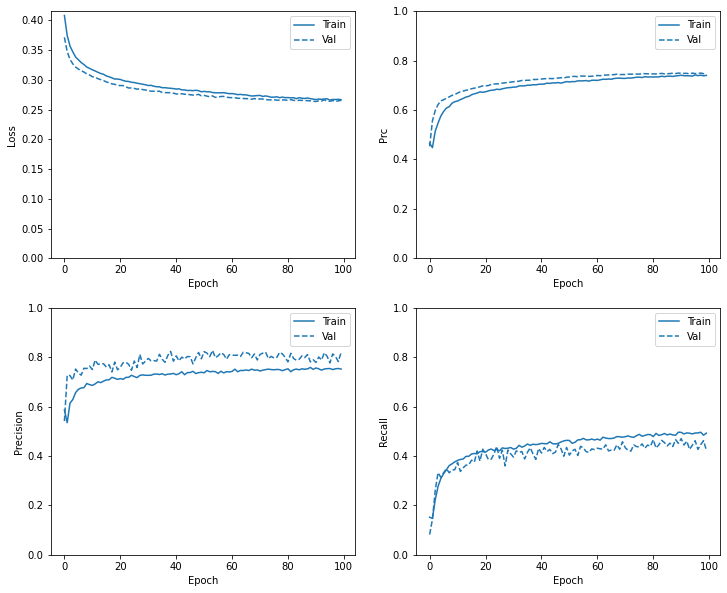

In [27]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
plot_metrics(baseline_history)

In [28]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [29]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Women not at risk (True Negatives): ', cm[0][0])
  print('Women not at risk detected (False Positives): ', cm[0][1])
  print('Women at risk not wrongly detected (False Negatives): ', cm[1][0])
  print('Women at risk detected (True Positives): ', cm[1][1])
  print('Total risk cases: ', np.sum(cm[1]))

loss :  0.26804080605506897
tp :  2245.0
fp :  456.0
tn :  22439.0
fn :  3102.0
accuracy :  0.8740174174308777
precision :  0.8311736583709717
recall :  0.4198616147041321
auc :  0.9172114133834839
prc :  0.75595623254776
get_f1 :  0.5583900213241577

Women not at risk (True Negatives):  22439
Women not at risk detected (False Positives):  456
Women at risk not wrongly detected (False Negatives):  3102
Women at risk detected (True Positives):  2245
Total risk cases:  5347


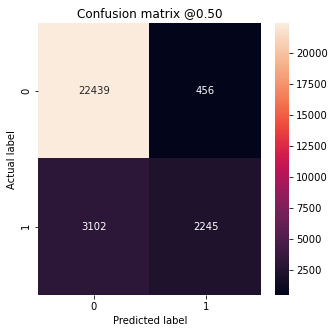

In [30]:
#testing the model
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [55]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.plot([0, 1], ls="--")
  plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  #plt.xlim([0,1])
  #plt.ylim([0,1])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
  #plt.subplots(1, figsize=(10,10))
  #plt.title('Receiver Operating Characteristic')
  #plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  #plt.plot([0, 1], ls="--")
  #plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
  #plt.ylabel('True Positive Rate')
  #plt.xlabel('False Positive Rate')
  #plt.grid(True)
  #ax = plt.gca()
  #ax.set_aspect('equal')
  #plt.show()
    #plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  #plt.xlabel('False positives [%]')
  #plt.ylabel('True positives [%]')
  #plt.xlim([0,1])
 # plt.ylim([0,1])
  #plt.grid(True)
  #ax = plt.gca()
  #ax.set_aspect('equal')

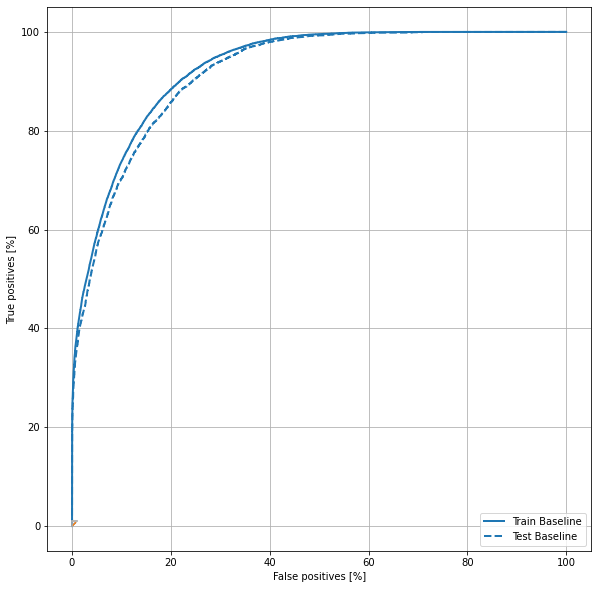

In [56]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [33]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

accuracy: 80.23%
INFO:tensorflow:Assets written to: model/1\assets
Saved model to disk


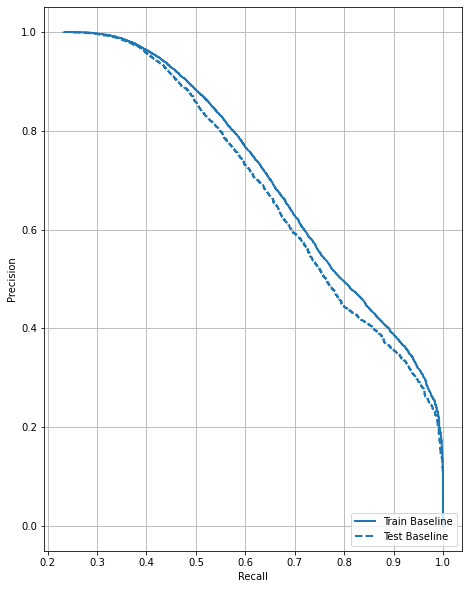

In [46]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

scores = model.evaluate(test_features, test_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[5], scores[5]*100))
model.save("model/1")
print("Saved model to disk")
#model = load_model('model.h5')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


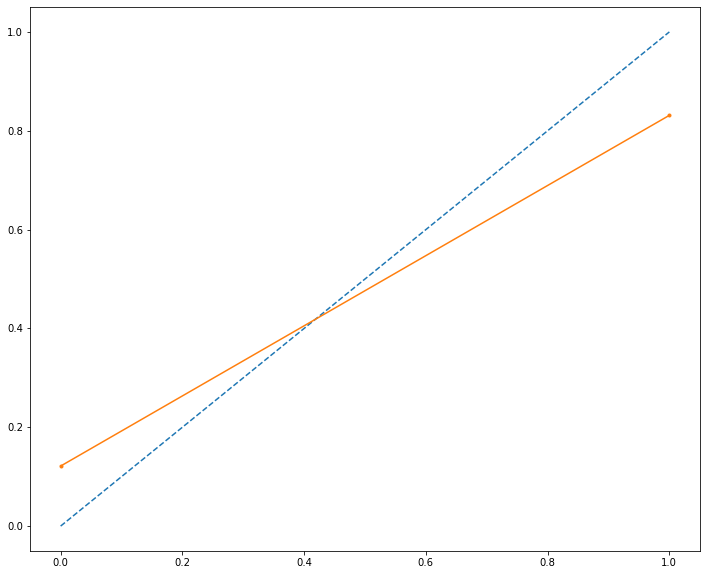

In [35]:
# predict probabilities
probs = model.predict_classes(test_features)
# reliability diagram
fop, mpv = calibration_curve(test_labels, probs, n_bins=10)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(mpv, fop, marker='.')
plt.show()


In [64]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
total = non_cancer + no_cancer
weight_for_0 = (1 / non_cancer) * (total / 2.0)
weight_for_1 = (1 / no_cancer) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.61
Weight for class 1: 2.70


In [37]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
45/45 [==============================] - 13s 278ms/step - loss: 0.6179 - tp: 12594.0000 - fp: 23100.0000 - tn: 73527.0000 - fn: 9395.0000 - accuracy: 0.7260 - precision: 0.3528 - recall: 0.5727 - auc: 0.7527 - prc: 0.4103 - get_f1: 0.3942 - val_loss: 0.5379 - val_tp: 3216.0000 - val_fp: 5841.0000 - val_tn: 12604.0000 - val_fn: 933.0000 - val_accuracy: 0.7002 - val_precision: 0.3551 - val_recall: 0.7751 - val_auc: 0.7970 - val_prc: 0.4120 - val_get_f1: 0.4768
Epoch 2/100
45/45 [==============================] - 4s 82ms/step - loss: 0.5341 - tp: 12929.0000 - fp: 23110.0000 - tn: 50622.0000 - fn: 3713.0000 - accuracy: 0.7032 - precision: 0.3588 - recall: 0.7769 - auc: 0.7980 - prc: 0.4076 - get_f1: 0.4912 - val_loss: 0.5361 - val_tp: 3589.0000 - val_fp: 6423.0000 - val_tn: 12022.0000 - val_fn: 560.0000 - val_accuracy: 0.6909 - val_precision: 0.3585 - val_recall: 0.8650 - val_auc: 0.8332 - val_prc: 0.4724 - val_get_f1: 0.5037
Epoch 3/100
45/45 [==============================] -

45/45 [==============================] - 2s 37ms/step - loss: 0.3961 - tp: 14328.0000 - fp: 17822.0000 - tn: 55910.0000 - fn: 2314.0000 - accuracy: 0.7772 - precision: 0.4457 - recall: 0.8610 - auc: 0.8946 - prc: 0.6753 - get_f1: 0.5878 - val_loss: 0.3996 - val_tp: 3579.0000 - val_fp: 4244.0000 - val_tn: 14201.0000 - val_fn: 570.0000 - val_accuracy: 0.7869 - val_precision: 0.4575 - val_recall: 0.8626 - val_auc: 0.9023 - val_prc: 0.7018 - val_get_f1: 0.5870
Epoch 36/100
45/45 [==============================] - 2s 38ms/step - loss: 0.3946 - tp: 14304.0000 - fp: 17732.0000 - tn: 56000.0000 - fn: 2338.0000 - accuracy: 0.7779 - precision: 0.4465 - recall: 0.8595 - auc: 0.8954 - prc: 0.6770 - get_f1: 0.5876 - val_loss: 0.3915 - val_tp: 3574.0000 - val_fp: 4243.0000 - val_tn: 14202.0000 - val_fn: 575.0000 - val_accuracy: 0.7868 - val_precision: 0.4572 - val_recall: 0.8614 - val_auc: 0.9019 - val_prc: 0.7022 - val_get_f1: 0.5854
Epoch 37/100
45/45 [==============================] - 2s 36ms/ste

45/45 [==============================] - 2s 35ms/step - loss: 0.3746 - tp: 14426.0000 - fp: 16719.0000 - tn: 57013.0000 - fn: 2216.0000 - accuracy: 0.7905 - precision: 0.4632 - recall: 0.8668 - auc: 0.9060 - prc: 0.7081 - get_f1: 0.6032 - val_loss: 0.3808 - val_tp: 3629.0000 - val_fp: 4134.0000 - val_tn: 14311.0000 - val_fn: 520.0000 - val_accuracy: 0.7940 - val_precision: 0.4675 - val_recall: 0.8747 - val_auc: 0.9116 - val_prc: 0.7330 - val_get_f1: 0.5963
Epoch 70/100
45/45 [==============================] - 2s 36ms/step - loss: 0.3728 - tp: 14449.0000 - fp: 16776.0000 - tn: 56956.0000 - fn: 2193.0000 - accuracy: 0.7901 - precision: 0.4627 - recall: 0.8682 - auc: 0.9068 - prc: 0.7103 - get_f1: 0.6047 - val_loss: 0.3682 - val_tp: 3580.0000 - val_fp: 3930.0000 - val_tn: 14515.0000 - val_fn: 569.0000 - val_accuracy: 0.8009 - val_precision: 0.4767 - val_recall: 0.8629 - val_auc: 0.9116 - val_prc: 0.7337 - val_get_f1: 0.6033
Epoch 71/100
45/45 [==============================] - 2s 36ms/ste

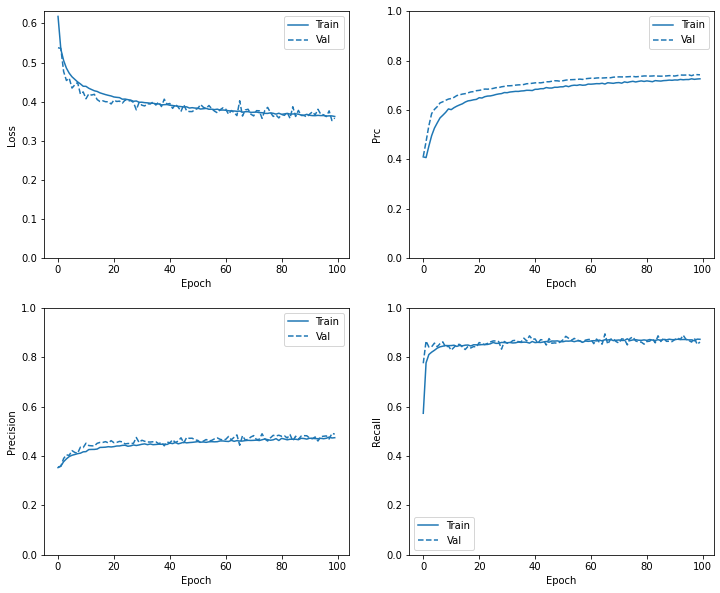

In [38]:
plot_metrics(weighted_history)

In [39]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.355093389749527
tp :  4597.0
fp :  4694.0
tn :  18201.0
fn :  750.0
accuracy :  0.807237446308136
precision :  0.49477988481521606
recall :  0.8597344160079956
auc :  0.9159802794456482
prc :  0.7496305704116821
get_f1 :  0.6271249651908875

Women not at risk (True Negatives):  18201
Women not at risk detected (False Positives):  4694
Women at risk not wrongly detected (False Negatives):  750
Women at risk detected (True Positives):  4597
Total risk cases:  5347


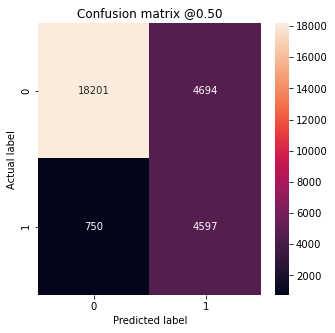

In [40]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

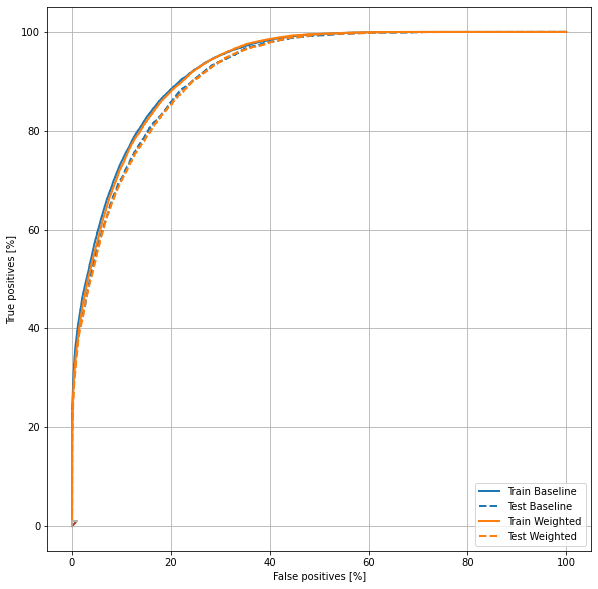

In [58]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plt.legend(loc='lower right')


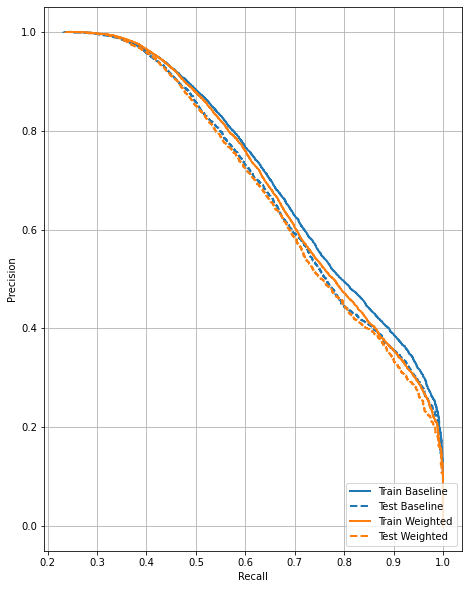

In [42]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [43]:
print("Before Undersampling, counts of label '1': {}".format(sum(train_labels == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(train_labels == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(train_X, train_labels.ravel())


print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 16642
Before Undersampling, counts of label '0': 73732 

After Undersampling, the shape of train_X: (33284, 11)
After Undersampling, the shape of train_y: (33284,) 

After Undersampling, counts of label '1': 16642
After Undersampling, counts of label '0': 16642


In [44]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train_miss,
    y_train_miss,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
17/17 [==============================] - 7s 401ms/step - loss: 0.7448 - tp: 12230.0000 - fp: 12025.0000 - tn: 27512.0000 - fn: 9759.0000 - accuracy: 0.6459 - precision: 0.5042 - recall: 0.5562 - auc: 0.7238 - prc: 0.5778 - get_f1: 0.4601 - val_loss: 0.5167 - val_tp: 0.0000e+00 - val_fp: 209.0000 - val_tn: 18236.0000 - val_fn: 4149.0000 - val_accuracy: 0.8071 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4002 - val_prc: 0.1433 - val_get_f1: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 2s 139ms/step - loss: 0.7090 - tp: 7223.0000 - fp: 6439.0000 - tn: 10203.0000 - fn: 9419.0000 - accuracy: 0.5236 - precision: 0.5287 - recall: 0.4340 - auc: 0.5342 - prc: 0.5409 - get_f1: 0.4636 - val_loss: 0.5558 - val_tp: 1.0000 - val_fp: 426.0000 - val_tn: 18019.0000 - val_fn: 4148.0000 - val_accuracy: 0.7976 - val_precision: 0.0023 - val_recall: 2.4102e-04 - val_auc: 0.3619 - val_prc: 0.1340 - val_get_f1: 4.2626e-04
Epoch 3/100
17/17 [=================

loss :  0.7213780283927917
tp :  1158.0
fp :  487.0
tn :  16155.0
fn :  15484.0
accuracy :  0.5201598405838013
precision :  0.703951358795166
recall :  0.0695829838514328
auc :  0.553842306137085
prc :  0.56382155418396
get_f1 :  0.06984288990497589

Women not at risk (True Negatives):  22439
Women not at risk detected (False Positives):  456
Women at risk not wrongly detected (False Negatives):  3102
Women at risk detected (True Positives):  2245
Total risk cases:  5347


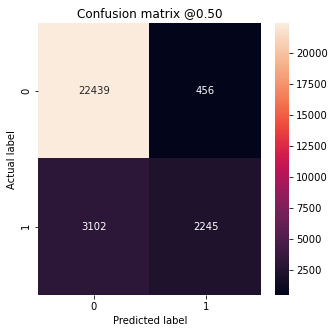

In [45]:
baseline_results = model.evaluate(X_train_miss,y_train_miss,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)